C:\Users\admin\AppData\Local\Temp\ipykernel_9016\922833982.py:18: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = wd.Chrome(path, options=options)


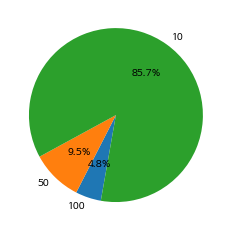

In [30]:
from selenium import webdriver as wd
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import matplotlib.font_manager as fm
import matplotlib as mpl
import matplotlib.pyplot as pltb
import pandas as pd
from selenium.webdriver.common.keys import Keys

import time

path = 'D:\\program_files\\chromedriver_win32\\chromedriver.exe'
options = wd.ChromeOptions()
options.add_experimental_option('excludeSwitches',['enable-logging'])
driver = wd.Chrome(path, options=options)

driver.get('https://www.youtube.com/c/paikscuisine/videos')

page = driver.page_source
soup = BeautifulSoup(page, 'html.parser')

datas = []

body_tag = driver.find_element(By.TAG_NAME, 'body')

while True:
    body_tag.send_keys(Keys.END)
    last_height = driver.execute_script('return document.documentElement.scrollHeight')
    
    for i in range(10):
        body_tag.send_keys(Keys.END)
        time.sleep(1)
        
        all_videos = soup.find_all(id='dismissible')


        for i in all_videos:
            title = i.find(id='video-title').get_text()
            views = i.select_one("#metadata-line > span:nth-of-type(1)").get_text()
            datas.append([title, views])
        
        
    # 스크롤 다운 후 스크롤 높이 다시 가져옴
    new_height = driver.execute_script("return document.documentElement.scrollHeight")
    
    if new_height == last_height:
        break
     
df = pd.DataFrame(datas, columns=['title', 'views'])

df.to_csv('./csv/youtube.csv', mode='w', encoding='utf-8-sig', index=True)
dict_youtube = {'100' : 0, '50' : 0, '10' : 0}
for item in datas:
    count = float(item[1].split('조회수')[1].split('만회')[0].strip())
    if  count > 100:
        dict_youtube['100'] += 1
    elif count > 50:
        dict_youtube['50'] += 1
    elif count > 10:
        dict_youtube['10'] += 1
    

font_name = fm.FontProperties(fname='C:\\Windows\\Fonts\\NanumBarunGothic.ttf').get_name()
mpl.rc('font', family=font_name)

plt.pie(dict_youtube.values(), labels=dict_youtube.keys(), autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

    


In [34]:
from pymongo import MongoClient
import urllib.request
from io import BytesIO
from PIL import Image
from gridfs import GridFSBucket


db = MongoClient().python_test
url = 'https://static01.nyt.com/images/2021/07/08/science/08TB-OTTERS1/merlin_190551999_3680585e-dbdd-4bff-96ad-0d74d1239df8-superJumbo.jpg'
data = urllib.request.urlopen(url).read()
Image.open(BytesIO(data))

bucket = GridFSBucket(db)
grid_in  = bucket.open_upload_stream('seaotter.jpg', metadata={'contentType ' : 'image/jpg'})

grid_in.write(data)
grid_in.close()

In [33]:
from pymongo import MongoClient
from gridfs import GridFS

fs = GridFS(db)
f = fs.get_last_version(filename='result.jpg')
dataImage = f.read()
real_img = Image.open(BytesIO(dataImage))
real_img.show()